# CIS 4321 Project Template
# Dr. Mohammad Salehan

This notebook explains the steps needed to be taken to complete this project. Please carefully answer to all questions raised in this template. The notebook you submit should be self-explanatory which means that you  need to clearly explain what each peice of code is suposed to do. All the cells containing code must include comments that explain what the code is supposed to do.<br>
To create a cell that contains comments, click on the cell, then from Cell manu select CellType -> MarkDown.

Group Members: Gregory Gonzalez & Jackson Nguyen

## 1. Problem definition
Start with explaining the problem and how you plan the address it using machine learning.

The problem that we would like to approach within this project is how to price your Air Bnb within the market based on predictors so you do not make the mistake of overlisting or underlisting your home. By using regression and clustering, we will analyze the data that we have retreived and predict the best possible predictors you should use in order to calculate yourlisting price.

## 2. Data description
Explain the source of data, what each record represents, number of records, and detailed descriptions of all variables including at least a one-sentence description and data type. Specify which variables will be used in analysis.

We collected our source of data from Kaggle, which had a number of Airbnb datasets.  The dataset that we ended up choosing to analyze was of Airbnbs in Washington.  Most of the data comes from the city of Seattle, but we decided to incorporate the rest of the cities within our analysis.  There are 7497 records.

Variables

index: identifier of row group
room_id: distinct id for room listing
host_id: distinct id for host providing the listing
room_type: type of room that the host is listing (entire home, private room)
city: city in which the listing is located
reviews: the number of reviews the listing contains from customers
overall_satisfaction: overall satisfaction rating on a scale from 0-5
accommodates: the number of accommodates that can stay per listing
bedrooms: the number of bedrooms the listing contains
bathrooms: the number of bathrooms the listing contains
price: the price of the listing per night
last_modified: the time in which the listing was updated
latitude: the latitude of the listing
longitude: the longitude of the listing
name: the name of the listing
currency: the specified currency for renting out the listing
rate_type: the rate at which you pay for the rented out listing

For our analysis, the variables that will be used include: room_type, city, reviews, overall_satisfaction, accommodates, bedrooms, bathrooms, and price.

## 3. Method of analysis
Explain the selected method (classification, regression, or clustering).
<ul><li>Classification: identify the label (i.e., dependent variable) and all predictors.
<li>Regression: identify the label (i.e., dependent variable) and all predictors.
<li>Clustering: explain what kind of clusters you expect to find and how those clusters would help you solve the stated problem.

## 4. Loading data
Load your dataset using a relative path. 

In [1]:
%matplotlib inline
!pip install seaborn

from pathlib import Path

import pandas as pd
from pandas.plotting import parallel_coordinates

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import pairwise
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.cluster import KMeans

import statsmodels.formula.api as sm

import matplotlib.pylab as plt

from dmba import plotDecisionTree, classificationSummary, regressionSummary
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

from scipy import stats
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

import numpy as np
import csv
import seaborn as sns


Here we are importing all the required packages in order to run our code for our analysis using multiple methods.

In [2]:
df=pd.read_csv('seattle_airbnb.csv')
df.shape #the original data rows and columns

(7497, 18)

Within this section we are loading our data set for analysis.

In [3]:
cluster_df = pd.read_excel('city_averages.xlsx')
cluster_df.shape

(18, 7)

Within this dataset we are loading our calculated averages of the variables we are implementing within our analysis by city.

In [4]:
cluster_df.set_index('city', inplace=True)

This dataset we cluster by city, thus we set our index as 'city'.

## 5. Descriptive statistics
Run descriptive statistics. Explain how the output will guide your analysis.

In [5]:
df.columns

Index(['index', 'room_id', 'host_id', 'room_type', 'city', 'reviews',
       'overall_satisfaction', 'accommodates', 'bedrooms', 'bathrooms',
       'price', 'last_modified', 'latitude', 'longitude', 'location', 'name',
       'currency', 'rate_type'],
      dtype='object')

Displays the columns.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7497 entries, 0 to 7496
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 7497 non-null   int64  
 1   room_id               7497 non-null   int64  
 2   host_id               7497 non-null   int64  
 3   room_type             7497 non-null   object 
 4   city                  7497 non-null   object 
 5   reviews               7497 non-null   int64  
 6   overall_satisfaction  6092 non-null   float64
 7   accommodates          7497 non-null   int64  
 8   bedrooms              7497 non-null   int64  
 9   bathrooms             7495 non-null   float64
 10  price                 7497 non-null   int64  
 11  last_modified         7497 non-null   object 
 12  latitude              7497 non-null   float64
 13  longitude             7497 non-null   float64
 14  location              7497 non-null   object 
 15  name                 

Displays information about the dataset.  Returns the data type and how many entries their are for each column.

In [7]:
df.head()

,index,room_id,host_id,room_type,city,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,last_modified,latitude,longitude,location,name,currency,rate_type
0,0,2318,2536,Entire home/apt,"Seattle, WA, United States",21,5.0,8,4,2.5,250,46:14.7,47.610819,-122.290816,0101000020E6100000D449B6BA9C925EC0416326512FCE...,"Casa Madrona - Urban Oasis, 1 block from the P...",USD,nightly
1,1,3335,4193,Entire home/apt,"Seattle, WA, United States",1,NaN,4,2,1.0,100,08:45.3,47.529846,-122.275840,0101000020E61000006FBBD05CA7915EC04DF564FED1C3...,Sweet Seattle Urban Homestead 2 Bdr,USD,nightly
2,2,4291,35749,Private room,"Seattle, WA, United States",63,4.5,2,1,1.0,82,04:19.9,47.687801,-122.313427,0101000020E6100000BDAB1E300F945EC0FB93F8DC09D8...,Sunrise in Seattle Master Suite,USD,nightly
3,3,5682,8993,Entire home/apt,"Seattle, WA, United States",462,5.0,2,0,1.0,49,11:25.5,47.523980,-122.359891,0101000020E6100000FCC7427408975EC009E1D1C611C3...,"Cozy Studio, min. to downtown -WiFi",USD,nightly
4,4,6606,14942,Entire home/apt,"Seattle, WA, United States",134,4.5,2,1,1.0,90,12:38.4,47.654109,-122.337605,0101000020E6100000D47D00529B955EC07782FDD7B9D3...,"Fab, private seattle urban cottage!",USD,nightly


Returns the first five rows represent within the data.

In [8]:
df.mean()

index                   3.945760e+03
room_id                 1.769433e+07
host_id                 5.103014e+07
reviews                 4.807123e+01
overall_satisfaction    4.841349e+00
accommodates            3.684274e+00
bedrooms                1.390289e+00
bathrooms               1.309807e+00
price                   1.130595e+02
latitude                4.762445e+01
longitude              -1.223181e+02
dtype: float64

Displays the average of each column.

In [9]:
df.describe()

,index,room_id,host_id,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,latitude,longitude
count,7497.000000,7.497000e+03,7.497000e+03,7497.000000,6092.000000,7497.000000,7497.000000,7495.000000,7497.000000,7497.000000,7497.000000
mean,3945.759504,1.769433e+07,5.103014e+07,48.071228,4.841349,3.684274,1.390289,1.309807,113.059490,47.624449,-122.318082
std,2288.671972,8.720156e+06,5.794042e+07,66.042522,0.281281,2.340016,1.011804,0.643388,122.690403,0.046457,0.058157
min,0.000000,2.318000e+03,2.536000e+03,0.000000,2.500000,1.000000,0.000000,0.000000,15.000000,47.508078,-122.420918
25%,1966.000000,1.119134e+07,8.242272e+06,5.000000,4.500000,2.000000,1.000000,1.000000,65.000000,47.603920,-122.350787
50%,3937.000000,1.951711e+07,2.696758e+07,22.000000,5.000000,3.000000,1.000000,1.000000,88.000000,47.620174,-122.328634
75%,5892.000000,2.471911e+07,7.736253e+07,64.000000,5.000000,4.000000,2.000000,1.500000,125.000000,47.660276,-122.303590
max,7974.000000,3.099842e+07,2.314354e+08,687.000000,5.000000,28.000000,8.000000,8.000000,5900.000000,47.723050,-122.114887


Returns statistical details which include the count, mean standard deviation, minimum, and maximum.

In [10]:
price_des = df['price'].describe()
price_des 

count    7497.000000
mean      113.059490
std       122.690403
min        15.000000
25%        65.000000
50%        88.000000
75%       125.000000
max      5900.000000
Name: price, dtype: float64

This allows us to know if the data is skewed or not, based on the data we are given, the max price will skew the data to the right.

In [11]:
cluster_df.columns

Index(['reviews', 'overall_satisfaction', 'accommodates', 'bedrooms',
       'bathrooms', 'price'],
      dtype='object')

In [12]:
cluster_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, Ballard to Yarrow Point
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reviews               18 non-null     float64
 1   overall_satisfaction  18 non-null     float64
 2   accommodates          18 non-null     float64
 3   bedrooms              18 non-null     float64
 4   bathrooms             18 non-null     float64
 5   price                 18 non-null     float64
dtypes: float64(6)
memory usage: 1008.0+ bytes


In [13]:
cluster_df.head()

,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price
city,,,,,,
Ballard,236.00000,5.00000,5.00000,1.00000,1.00000,75.0000
Bellevue,21.68944,4.78631,3.26397,1.53106,1.28106,102.5559
Bothell,0.00000,0.00000,5.50000,3.00000,2.50000,399.5000
Capitol Hill,52.00000,5.00000,4.00000,2.00000,1.00000,160.0000
Clyde Hill,89.50000,5.00000,2.00000,0.00000,1.00000,94.5000


In [14]:
cluster_df.mean()

reviews                  40.507336
overall_satisfaction      4.094063
accommodates              4.191032
bedrooms                  1.829806
bathrooms                 1.470464
price                   154.115555
dtype: float64

In [15]:
cluster_df.describe()

,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,40.507336,4.094063,4.191032,1.829806,1.470464,154.115555
std,55.425346,1.885907,1.820247,1.003417,0.572124,90.862772
min,0.000000,0.000000,2.000000,0.000000,1.000000,75.000000
25%,11.244898,4.789137,3.253493,1.331259,1.000000,100.638975
50%,21.714720,4.878008,3.856632,1.640530,1.321180,125.067500
75%,47.680363,5.000000,4.559796,2.000000,1.641474,157.500000
max,236.000000,5.000000,9.000000,4.000000,3.000000,399.500000


## 6. Missing values and outliers
Explain the steps that you plan to take to handle missing values and any potential outliers. Run code that handles missing values and outliers.

In [16]:
df.isna().sum()

index                      0
room_id                    0
host_id                    0
room_type                  0
city                       0
reviews                    0
overall_satisfaction    1405
accommodates               0
bedrooms                   0
bathrooms                  2
price                      0
last_modified              0
latitude                   0
longitude                  0
location                   0
name                       0
currency                   0
rate_type                  0
dtype: int64

Displays which columns contain missing values within our dataset.

In [17]:
df2 = df.dropna()
df2.shape  

(6090, 18)

Drops the missing values wtihin our dataset.

In [18]:
df2_values = df2.drop(columns =['index', 'room_id', 'host_id', 'room_type', 'city', 'last_modified','latitude', 'longitude', 'location', 'name', 'currency', 'rate_type'], axis =1)
##z = np.abs(stats.zscore(df2_values))
##threshold = 3
##print(np.where(z>3))

Dropped missing values, we cannot do much about these values that are missing because they were never inputted so we cannot make up a value for them and potentially skew our data.

In [19]:
#z[5351]
#df2_values.shape

In [20]:
#df_outliers = df2_values[(z < 3).all(axis=1)]
#df_outliers.shape

In [21]:
cluster_df.isnull().sum()

reviews                 0
overall_satisfaction    0
accommodates            0
bedrooms                0
bathrooms               0
price                   0
dtype: int64

## 7. Data visualization
Please see the project description for requirements.

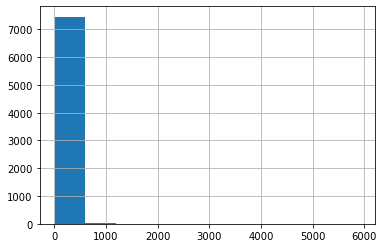

In [22]:
df['price'].hist()

The histogram here does not tell us much about the curve of the graph so we would like to plot the histogram again without the outliers.

(array([ 518., 1319., 2062., 1252.,  543.,  568.,  335.,  269.]),
 array([ 15,  40,  65,  90, 115, 130, 155, 180, 205]),
 <a list of 8 Patch objects>)

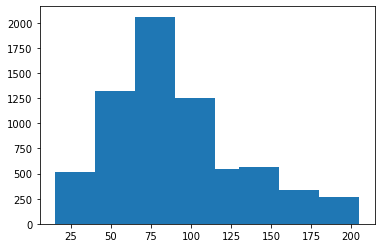

In [23]:
plt.hist(df['price'], bins = [15, 40, 65, 90, 115, 130, 155, 180, 205])


75% of the data ies within the range of 15-125, so we wanted to show a histogram where the majority of the data is coming from and left out the outliers.

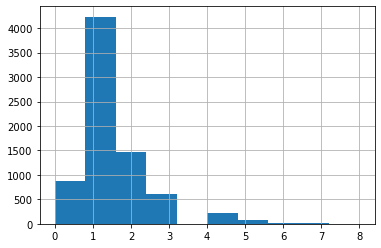

In [24]:
df['bedrooms'].hist()

Displays a histogram showing the distribution of bedrooms across the dataset.

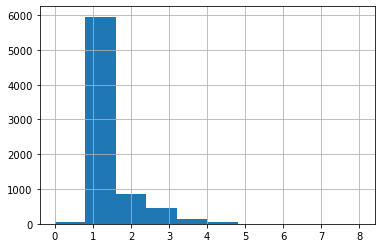

In [25]:
df['bathrooms'].hist()

Displays a histogram showing the distribution of bathrooms across the dataset.

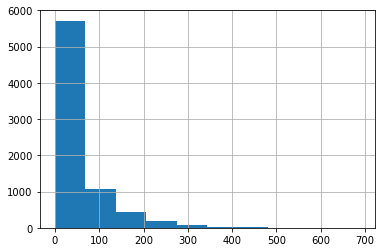

In [26]:
df['reviews'].hist()

Displays a histogram showing the distribution of reviews of customers across the dataset.

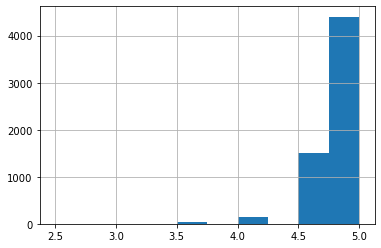

In [27]:
df['overall_satisfaction'].hist()

Displays a histogram showing the distribution of overall satisfaction of customers across the dataset.

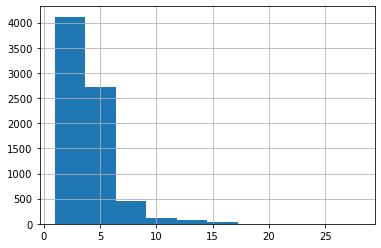

In [28]:
df['accommodates'].hist()

Displays a histogram showing the distribution of accommodates across the data.

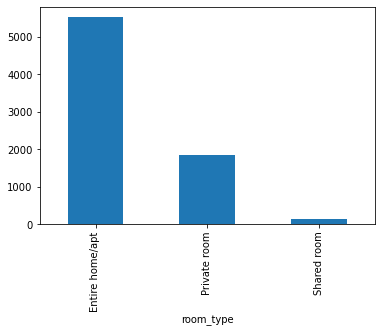

In [29]:
df.groupby('room_type').size().plot(kind='bar')

Displays a graphical representation of the frequency related to that of our categorical variable 'room_type'.

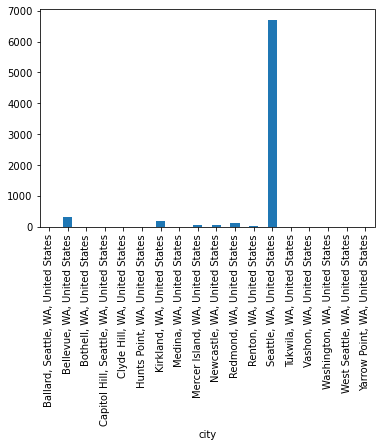

In [30]:
df.groupby('city').size().plot(kind='bar')

Displays a graphical representation of the frequency related to that of our categorical variable 'city'.

In [31]:
grouped_by_city = df.groupby('city')
grouped_by_city['price'].mean()
#we can see which area within WA is priced

city
Ballard, Seattle, WA, United States          75.000000
Bellevue, WA, United States                 102.555901
Bothell, WA, United States                  399.500000
Capitol Hill, Seattle, WA, United States    160.000000
Clyde Hill, WA, United States                94.500000
Hunts Point, WA, United States              349.000000
Kirkland, WA, United States                 125.135000
Medina, WA, United States                   126.750000
Mercer Island, WA, United States            260.540000
Newcastle, WA, United States                108.081633
Redmond, WA, United States                   84.636364
Renton, WA, United States                    97.333333
Seattle, WA, United States                  112.547839
Tukwila, WA, United States                  150.000000
Vashon, WA, United States                   125.000000
Washington, WA, United States               129.000000
West Seattle, WA, United States             100.000000
Yarrow Point, WA, United States             174.500000
Name:

Displays the average price of the listing based off of the city within Washington.

In [32]:
grouped_by_accommodates = df.groupby('accommodates')
grouped_by_accommodates['price'].mean() 

accommodates
1      54.573363
2      79.095602
3      87.962121
4     112.199869
5     129.383442
6     162.628922
7     176.687023
8     255.184502
9     225.066667
10    337.632653
11    174.461538
12    319.849057
13    298.400000
14    344.083333
15    735.000000
16    395.655172
20    155.333333
23    234.000000
25    204.000000
28    371.000000
Name: price, dtype: float64

We can see the average price of the listing based off the number of accommodates.

In [33]:
grouped_by_overall_satisfaction = df.groupby('overall_satisfaction')
grouped_by_overall_satisfaction['price'].mean()

overall_satisfaction
2.5     84.000000
3.0    180.750000
3.5    100.046512
4.0     92.021277
4.5     97.063957
5.0    111.268969
Name: price, dtype: float64

We can see the average price of the listing based off of the overall satisfaction ratings.  However, we assume that many people do not leave feedback for their stay at an Airbnb, so these scores may not affect price as much

In [34]:
grouped_by_bedrooms = df.groupby('bedrooms')
grouped_by_bedrooms['price'].mean()

bedrooms
0     82.288684
1     81.477799
2    134.902721
3    216.349180
4    280.469484
5    331.472222
6    558.800000
7    435.777778
8    794.666667
Name: price, dtype: float64

Displays the average price of the listing based off the number of bedrooms.

In [35]:
grouped_by_bathrooms = df.groupby('bathrooms')
grouped_by_bathrooms['price'].mean()

bathrooms
0.0     136.900000
0.5      69.642857
1.0      89.921180
1.5     112.838791
2.0     156.274100
2.5     220.138408
3.0     245.909091
3.5     235.846667
4.0     390.323529
4.5    1305.666667
5.0     597.000000
6.0    2325.000000
8.0      38.000000
Name: price, dtype: float64

Displays the average price of the listing based off the number of bathrooms.

## 8. Correlation analysis
Generate a correlation matrix and interpret it. Is multicollinearity an issue?

In [36]:
df.corr()

,index,room_id,host_id,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,latitude,longitude
index,1.000000,0.986648,0.451378,-0.507586,-0.025078,0.035365,0.006124,0.000719,-0.055265,-0.074949,0.050741
room_id,0.986648,1.000000,0.453296,-0.511793,-0.018600,0.038484,0.006022,-0.000711,-0.053716,-0.079784,0.047569
host_id,0.451378,0.453296,1.000000,-0.200814,0.015221,0.036426,0.030678,0.020584,-0.014979,-0.028514,0.091241
reviews,-0.507586,-0.511793,-0.200814,1.000000,0.116875,-0.068583,-0.146709,-0.122522,-0.129536,-0.001282,-0.106726
overall_satisfaction,-0.025078,-0.018600,0.015221,0.116875,1.000000,0.012818,0.032538,0.007902,0.068808,-0.008918,-0.045116
accommodates,0.035365,0.038484,0.036426,-0.068583,0.012818,1.000000,0.802680,0.547146,0.448353,-0.016340,-0.064127
bedrooms,0.006124,0.006022,0.030678,-0.146709,0.032538,0.802680,1.000000,0.623590,0.463130,-0.003920,0.024624
bathrooms,0.000719,-0.000711,0.020584,-0.122522,0.007902,0.547146,0.623590,1.000000,0.426785,0.004396,0.014980
price,-0.055265,-0.053716,-0.014979,-0.129536,0.068808,0.448353,0.463130,0.426785,1.000000,0.023346,-0.047010
latitude,-0.074949,-0.079784,-0.028514,-0.001282,-0.008918,-0.016340,-0.003920,0.004396,0.023346,1.000000,-0.055931


Computes the pairwise correlations of the columns within the dataset.

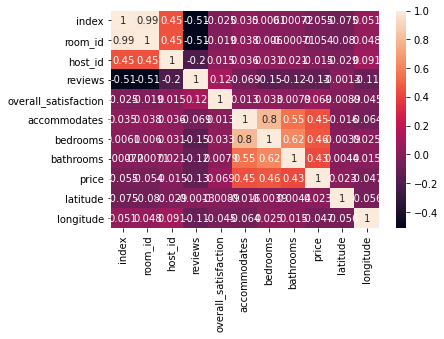

In [37]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

Displays a visual representaion of the correlation matrix.

## 9. Data preprocessing
In this step you conduct preprocessing. Different algorithms require different types of preprocessing so you may need to replicate this step multiple times for different models.

In [38]:
cluster_numeric_df = cluster_df[['reviews', 'overall_satisfaction', 'accommodates', 'bedrooms', 'bathrooms', 'price']]

We are creating a dataframe which only contains numeric values as we will be disregarding the categorical values for Cluster Analysis.

In [39]:
cluster_numeric_df.columns

Index(['reviews', 'overall_satisfaction', 'accommodates', 'bedrooms',
       'bathrooms', 'price'],
      dtype='object')

Displays the numeric columns.

In [40]:
cluster_numeric_df = cluster_numeric_df.apply(lambda x: x.astype('float64'))
cluster_numeric_df.head()

,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price
city,,,,,,
Ballard,236.00000,5.00000,5.00000,1.00000,1.00000,75.0000
Bellevue,21.68944,4.78631,3.26397,1.53106,1.28106,102.5559
Bothell,0.00000,0.00000,5.50000,3.00000,2.50000,399.5000
Capitol Hill,52.00000,5.00000,4.00000,2.00000,1.00000,160.0000
Clyde Hill,89.50000,5.00000,2.00000,0.00000,1.00000,94.5000


We incoporate the lambda function to convert each numeric value to float while displaying the first five rows.

### 9.1. Dummies
Explain why or why not you need to create dummies. Create dummies below if needed.

In [41]:
predictors = ['reviews', 'overall_satisfaction', 'accommodates', 'bedrooms', 'bathrooms', 'room_type']

outcome = 'price'

X = df2[predictors]
X = pd.get_dummies(X, columns=['room_type'], drop_first=True)
y = df2[outcome]

print(X.shape)

X.head(1)

(6090, 7)


,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,room_type_Private room,room_type_Shared room
0,21,5.0,8,4,2.5,0,0


Data preprocessing for Regression Analysis.  Here we set our indepedent variables as: 'reviews', 'overall_satisfaction', 'accommodates', 'bedrooms', 'bathrooms' and 'room_type', which will be our predictors for our dependent variable: 'price', which is our target/outcome.  Our independent variables will be included within the dataframe named X, and our dependent variable will be include within a single-dimension dataframe named y.  Futhermore, we incorporate a dummy varaible to that of 'room_type' as it is a categorical variable that we want to include within our analysis.

### 9.2. Normalization

Explain why or why not you need to normalize the data. Normalize it below if needed.

In [42]:
cluster_numeric_df_norm = cluster_numeric_df.apply(preprocessing.scale, axis=0)
cluster_numeric_df_norm.head()

,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price
city,,,,,,
Ballard,3.629392,0.494299,0.457312,-0.850956,-0.846151,-0.895958
Bellevue,-0.349361,0.377705,-0.524071,-0.306360,-0.340651,-0.583896
Bothell,-0.752033,-2.233809,0.739964,1.200019,1.851669,2.778899
Capitol Hill,0.213365,0.494299,-0.107991,0.174532,-0.846151,0.066639
Clyde Hill,0.909566,0.494299,-1.238597,-1.876443,-0.846151,-0.675127


Here we normalize the numeric values.  The reason why we must normalize our numeric values for Cluster Analysis is to prevent certain variables with larger scales from exercing control of how the clusters are interpreted.

## 10. Modeling
Please refer to project description for the requirements.

REGRESSION ANALYSIS





In [43]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

Now we partition the data, by incoporating training and validation test by setting the test size to 40%.

In [44]:
seattle_lm = LinearRegression()
seattle_lm.fit(train_X, train_y)

LinearRegression()

Create an instance for Linear Regression.  We will be training the model on training data. 

In [45]:
print('intercept', seattle_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': seattle_lm.coef_}))

regressionSummary(train_y, seattle_lm.predict(train_X))

intercept -37.99642582987998
                Predictor  coefficient
0                 reviews    -0.105432
1    overall_satisfaction    15.360909
2            accommodates     0.560205
3                bedrooms    32.707863
4               bathrooms    32.593842
5  room_type_Private room   -41.591845
6   room_type_Shared room   -82.637411

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 64.5331
            Mean Absolute Error (MAE) : 36.9066
          Mean Percentage Error (MPE) : -16.7986
Mean Absolute Percentage Error (MAPE) : 38.9608


Prints the predictors coefficients.  Displays how much the predictors factor into the price of the Airbnb and prints the performance measures of the training set.

reviews: For each additional review from a customer, the average price of the Airbnb listing decreases by around $0.11.

overall_satisfaction: For each additional overall satisfaction score provided from the customer, the average price of the Airbnb listing increases by around $15.36.

accommodates: For each additional accommodate staying at the Airbnb, the average price increases by around $0.56.

bedrooms: For each additional bedroom that the listing contains, the average price increases by around $32.71.

bathrooms: For each additional bathroom that the listing contains, the average price increases by around $32.59.

room_type_Private room: When the Airbnb is a private room, the average price decreases by around $41.59.

room_type_Shared room: When the Airbnb is a shared room, the average price decreases by around $82.64.

RMSE: 64.5331

MAE: 36.9066

MPE: -16.7986

MAPE: 38.9608

In [46]:
pred_y = seattle_lm.predict(train_X)

print('adjusted r2 : ', adjusted_r2_score(train_y, pred_y, seattle_lm))
print('AIC : ', AIC_score(train_y, pred_y, seattle_lm))
print('BIC : ', BIC_score(train_y, pred_y, seattle_lm))

adjusted r2 :  0.4435355257085758
AIC :  40841.34211523716
BIC :  40897.174314869604


Test the model using the training set in order to make predictions.  44.35% of variants in the price of Airbnb listings can be explained from the predictors variables and 55.65% cannot be explained within this model, which is where the MAPE 38.96 comes from.

In [47]:
seattle_lm_pred = seattle_lm.predict(valid_X)

result = pd.DataFrame({'Predicted': seattle_lm_pred, 'Actual': valid_y, 'Residual': valid_y - seattle_lm_pred})

print(result.head(20))

       Predicted  Actual   Residual
3712  169.016548     250  80.983452
2131  103.543321      50 -53.543321
1037  215.015220     250  34.984780
2347   54.887535      85  30.112465
171    61.707567      79  17.292433
3637  104.913937     105   0.086063
6007   56.318005     110  53.681995
5528   59.842837      75  15.157163
6288  136.488795      94 -42.488795
4652   66.829044     100  33.170956
3546  102.344227      89 -13.344227
2715   79.327015      84   4.672985
5309  134.241679      73 -61.241679
3734  104.913937      95  -9.913937
2764   55.641637      75  19.358363
369    64.347800     100  35.652200
6529  170.672705      95 -75.672705
3276   91.524078      60 -31.524078
5171   21.352295      38  16.647705
3344   97.916085     122  24.083915


Test the model using the validation set in order to make predictions.  Prints the predicted and actual value of the Airbnb listing.  The difference between the actual and prediction produces the error/residual.

In [48]:
regressionSummary(valid_y, seattle_lm_pred)


Regression statistics

                      Mean Error (ME) : 1.0219
       Root Mean Squared Error (RMSE) : 55.5206
            Mean Absolute Error (MAE) : 35.8654
          Mean Percentage Error (MPE) : -15.1259
Mean Absolute Percentage Error (MAPE) : 37.8769


Prints the performance measures of the validation set.  When looking at both the training and validation sets, the RMSE of the training is at 64.5331 and the validation set is at 55.5206.  Furthermore, we have the MAPE at 38.9608 for training and 37.8769 for validation.  The model performs better during the validation set than that of the training set.  It is very slight, but with RMSE and MAPE being less in validation than training, there is no concern of overfitting.

RMSE: 55.5206

MAE: 35.8654

MPE: -15.1259

MAPE: 37.8769

0.8957307060755336


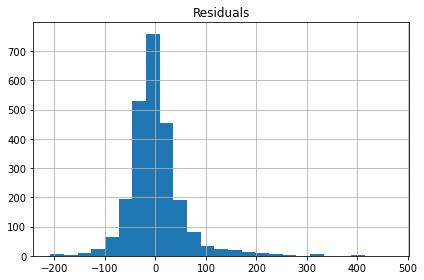

In [49]:
seattle_lm_pred = seattle_lm.predict(valid_X)
all_residuals = valid_y - seattle_lm_pred

print(len(all_residuals[(all_residuals > -75) & (all_residuals < 75)]) / len(all_residuals))

ax = pd.DataFrame({'Residuals': all_residuals}).hist(bins=25)

plt.tight_layout()
plt.show()


The chart displayed above about the residuals displays that around 89.57 percent of the Airbnb prices are within 75 dollars of the actual price and around 10.43 percent are outside of the actual price.  The graph displays that most are in between 100 dollars; due to the graph being fairly symmetric and balanced around 0, it is not really overestimating or underestimating. 

In [50]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    pred_y = model.predict(train_X[variables])
    # we negate as score is optimized to be as low as possible
    return -adjusted_r2_score(train_y, pred_y, model)

allVariables = train_X.columns
results = exhaustive_search(allVariables, train_model, score_model)

data = []
for result in results:
    model = result['model']
    variables = result['variables']
    AIC = AIC_score(train_y, model.predict(train_X[variables]), model)
    
    d = {'n': result['n'], 'r2adj': -result['score'], 'AIC': AIC}
    d.update({var: var in result['variables'] for var in allVariables})
    data.append(d)
pd.set_option('display.width', 100)
print(pd.DataFrame(data, columns=('n', 'r2adj', 'AIC') + tuple(sorted(allVariables))))
pd.reset_option('display.width')

   n     r2adj           AIC  accommodates  bathrooms  bedrooms  overall_satisfaction  reviews  \
0  1  0.362654  41331.229506         False      False      True                 False    False   
1  2  0.399275  41116.001843         False      False      True                 False    False   
2  3  0.422905  40970.368453         False       True      True                 False    False   
3  4  0.435465  40890.962806         False       True      True                 False    False   
4  5  0.441310  40853.929490         False       True      True                 False     True   
5  6  0.443625  40839.756904         False       True      True                  True     True   
6  7  0.443536  40841.342115          True       True      True                  True     True   

   room_type_Private room  room_type_Shared room  
0                   False                  False  
1                    True                  False  
2                    True                  False  
3          

Prints exhaustive search, which is all of the possible subsets of the predictors.  Based on exhaustive search, the best model would be 6 as it has the lowest AIC.  The features of this model include: 'bathrooms', 'bedrooms', 'overall_satisfaction', 'reviews', 'room_type_Private room', and 'room_type_Shared room'.

In [51]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = backward_elimination(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: reviews, overall_satisfaction, accommodates, bedrooms, bathrooms, room_type_Private room, room_type_Shared room
Start: score=40841.34
Step: score=40839.76, remove accommodates
Step: score=40839.76, remove None
['reviews', 'overall_satisfaction', 'bedrooms', 'bathrooms', 'room_type_Private room', 'room_type_Shared room']


Prints backward elimination.  First defines the train model and score model.  Here, it starts with all the predictors and successively eliminates the least useful predictors one at a time, which in this case happens to be 'accommodates'.  It keeps all the other predictors.  By eliminating the least useful predictor, the score decreases from 40841.34 to 40839.76.

In [52]:
regressionSummary(valid_y, best_model.predict(valid_X[best_variables]))


Regression statistics

                      Mean Error (ME) : 1.0218
       Root Mean Squared Error (RMSE) : 55.5608
            Mean Absolute Error (MAE) : 35.9410
          Mean Percentage Error (MPE) : -15.1263
Mean Absolute Percentage Error (MAPE) : 37.9933


Prints the performance measures of backward elimination.  This model performs better than that of the training set as it is compared from an MAPE of 38.9608 percent and is now 37.9933 percent; however, it performs worse than the validation set which has an MAPE of 37.8769 percent.  

RMSE: 55.5608
MAE: 35.9410
MPE: -15.1263
MAPE: 37.9933

In [53]:
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = forward_selection(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: reviews, overall_satisfaction, accommodates, bedrooms, bathrooms, room_type_Private room, room_type_Shared room
Start: score=42976.15, constant
Step: score=41331.23, add bedrooms
Step: score=41116.00, add room_type_Private room
Step: score=40970.37, add bathrooms
Step: score=40890.96, add room_type_Shared room
Step: score=40853.93, add reviews
Step: score=40839.76, add overall_satisfaction
Step: score=40839.76, add None
['bedrooms', 'room_type_Private room', 'bathrooms', 'room_type_Shared room', 'reviews', 'overall_satisfaction']


Prints the forward selection.  Opposite that of backward elimination, forward selction starts with no predictors, but adds them one at a time.  We ended up getting the same thing with that of backward elimination.  

In [54]:
best_model, best_variables = stepwise_selection(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: reviews, overall_satisfaction, accommodates, bedrooms, bathrooms, room_type_Private room, room_type_Shared room
Start: score=42976.15, constant
Step: score=41331.23, add bedrooms
Step: score=41116.00, add room_type_Private room
Step: score=40970.37, add bathrooms
Step: score=40890.96, add room_type_Shared room
Step: score=40853.93, add reviews
Step: score=40839.76, add overall_satisfaction
Step: score=40839.76, unchanged None
['bedrooms', 'room_type_Private room', 'bathrooms', 'room_type_Shared room', 'reviews', 'overall_satisfaction']


Prints the stepwise selection.  Basically, the same thing as forward selection, but takes into consideration dropping a predictors.  However, in this case nothing was dropped, thus, the same output.  

REGRESSION TREES

In [55]:
predictors = ['reviews', 'overall_satisfaction', 'accommodates', 'bedrooms', 'bathrooms', 'room_type']

outcome = 'price'

X = df2[predictors]
X = pd.get_dummies(X, columns=['room_type'], drop_first=True)
y = df2[outcome]

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

param_grid = {
    'max_depth': [5, 10, 15, 20, 25], 
    'min_impurity_decrease': [0, 0.001, 0.005, 0.01], 
    'min_samples_split': [10, 20, 30, 40, 50], 
}
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Initial parameters: ', gridSearch.best_params_)

param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
    'min_impurity_decrease': [0, 0.001, 0.002, 0.003, 0.005, 0.006, 0.007, 0.008], 
    'min_samples_split': [14, 15, 16, 18, 20, ], 
}
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Improved parameters: ', gridSearch.best_params_)

regTree = gridSearch.best_estimator_

Initial parameters:  {'max_depth': 5, 'min_impurity_decrease': 0, 'min_samples_split': 10}
Improved parameters:  {'max_depth': 5, 'min_impurity_decrease': 0, 'min_samples_split': 14}


Here we train another predictive model using Regression Trees.  Preprocessing steps are very similar to that of linear regression as we keep the dependent and independent variables the same for analysis.  The prediction is computed as the average numerical target variables in the tree, and the sum of squared deviations measures the impurity.  We train the best parameters and get the initial parameter with max_depth of 5, min_samples_split of 10; and improved parameters with a max_depth of 5, min_samples_split of 15, both with min_impurity_decrease of 0.

In [56]:
regressionSummary(train_y, regTree.predict(train_X))
regressionSummary(valid_y, regTree.predict(valid_X))


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 58.1505
            Mean Absolute Error (MAE) : 33.9307
          Mean Percentage Error (MPE) : -17.1322
Mean Absolute Percentage Error (MAPE) : 35.3639

Regression statistics

                      Mean Error (ME) : 1.8104
       Root Mean Squared Error (RMSE) : 56.3754
            Mean Absolute Error (MAE) : 35.0508
          Mean Percentage Error (MPE) : -15.7955
Mean Absolute Percentage Error (MAPE) : 35.3620


Prints the performance measures of the training and validation sets of Regression Trees.  Training set has a MAPE of 35.3639 percent and validation set has a MAPE of 35.3620.  Validation set slightly performs better than training set with a difference of around 0.0019.  

0.8944991789819376


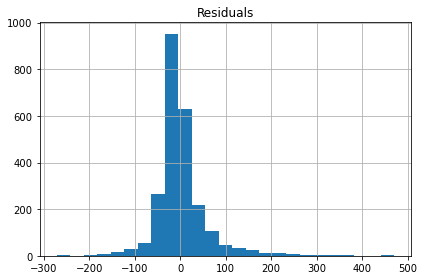

In [57]:
regTree_pred = regTree.predict(valid_X)
all_residuals = valid_y - regTree_pred


print(len(all_residuals[(all_residuals > -75) & (all_residuals < 75)]) / len(all_residuals))

ax = pd.DataFrame({'Residuals': all_residuals}).hist(bins=25)

plt.tight_layout()
plt.show()

The chart displayed above about the residuals displays that around 89.45 percent of the Airbnb prices are within 75 dollars of the actual price and around 10.55 percent are outside of the actual price.  The graph displays that most are in between 100 dollars; due to the graph being fairly symmetric and balanced around 0, it is not really overestimating or underestimating. 

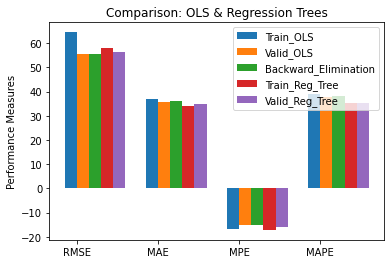

In [58]:
N = 4

Train_OLS = (64.5331, 36.9066, -16.7986,  38.9608)

Valid_OLS = (55.5206, 35.8654, -15.1259, 37.8769)

Backward_Elimination = (55.5608, 35.9410,  -15.1263, 37.9933)

Train_Reg_Tree = (58.1505, 33.9307, -17.1322, 35.3639)

Valid_Reg_Tree = (56.3754, 35.0508, -15.7955, 35.3620)

ind = np.arange(N)
width = 0.15

plt.bar(ind, Train_OLS, width, label='Train_OLS')
plt.bar(ind + width, Valid_OLS, width, label='Valid_OLS')
plt.bar(ind + width + width, Backward_Elimination, width, label='Backward_Elimination')
plt.bar(ind + width + width + width, Train_Reg_Tree, width, label='Train_Reg_Tree')
plt.bar(ind + width + width + width + width, Valid_Reg_Tree, width, label='Valid_Reg_Tree')

plt.ylabel('Performance Measures')
plt.title('Comparison: OLS & Regression Trees')

plt.xticks(ind + width / 2, ('RMSE', 'MAE', 'MPE', 'MAPE'))
plt.legend(loc='best')
plt.show()

The bar chart displayed above shows the comparison of performance measures amongst OLS and Regression Tree models.  Based on the bar chart, the best model would have to be that of the validation tests.  For both Valid_OLS and Valid_Reg_Tree, they both have the lowest RMSE and MAPE, however Valid_Reg_Tree has the biggest difference of MAPE at 35.3620 compared to that of Valid_OLS.  Thus, the best model with the least error is Valid_Reg_Tree.

CLUSTER ANALYSIS

In [59]:
kmeans = KMeans(n_clusters=10, random_state=0) .fit(cluster_numeric_df_norm)
memb = pd.Series(kmeans.labels_, index=cluster_numeric_df_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

0 :  West Seattle, Yarrow Point
1 :  Hunts Point
2 :  Washington
3 :  Ballard
4 :  Bellevue, Capitol Hill, Kirkland, Medina, Newcastle, Redmond, Renton, Seattle
5 :  Bothell
6 :  Clyde Hill
7 :  Tukwila
8 :  Mercer Island
9 :  Vashon


We make 10 clusters hereand use the random state at 0 to make the centriods random. We then fit it into the normal data frame which will give us 10 different clujsters.

In [60]:
kmeans.labels_

array([3, 4, 5, 4, 6, 1, 4, 4, 8, 4, 4, 4, 4, 7, 9, 2, 0, 0])

We can see where each of the citys cluster value is within kmeans

In [61]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=cluster_numeric_df_norm.columns)
pd.set_option('precision', 4)
print(centroids)
pd.set_option('precision', 9)

   reviews  overall_satisfaction  accommodates  bedrooms  bathrooms   price
0  -0.3529                0.4943       -0.9559   -0.8510    -0.8462 -0.1910
1  -0.5664                0.4943        2.7185    2.2255     2.7509  2.2070
2  -0.7520               -2.2338       -0.1080    0.1745     0.9524 -0.2844
3   3.6294                0.4943        0.4573   -0.8510    -0.8462 -0.8960
4  -0.1884                0.4106       -0.3441   -0.2156    -0.3384 -0.4472
5  -0.7520               -2.2338        0.7400    1.2000     1.8517  2.7789
6   0.9096                0.4943       -1.2386   -1.8764    -0.8462 -0.6751
7   0.8260                0.4943        2.1532    2.2255     0.9524 -0.0466
8  -0.3484                0.4512        0.0503    0.1540     0.4308  1.2052
9  -0.7335               -2.2338       -0.1080    0.1745    -0.8462 -0.3297


Here we print the average centriod for each cluster. 

In [62]:
withinClusterSS = [0] * 10
clusterCount = [0] * 10
for cluster, distance in zip(kmeans.labels_, kmeans.transform(cluster_numeric_df_norm)):
    withinClusterSS[cluster] += distance[cluster]**2
    clusterCount[cluster] += 1
for cluster, withClustSS in enumerate(withinClusterSS):
    print('Cluster {} ({} members): {:5.2f} within cluster'.format(cluster, 
        clusterCount[cluster], withinClusterSS[cluster]))

Cluster 0 (2 members):  0.70 within cluster
Cluster 1 (1 members):  0.00 within cluster
Cluster 2 (1 members):  0.00 within cluster
Cluster 3 (1 members):  0.00 within cluster
Cluster 4 (8 members):  2.71 within cluster
Cluster 5 (1 members):  0.00 within cluster
Cluster 6 (1 members):  0.00 within cluster
Cluster 7 (1 members):  0.00 within cluster
Cluster 8 (1 members):  0.00 within cluster
Cluster 9 (1 members):  0.00 within cluster


We can see how far each value is away from the clusters. Most of these are zero because they only have 1 member within their cluster.

In [63]:
print(pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_, metric='euclidean')))

             0            1            2            3            4  \
0  0.000000000  6.457664003  3.551907505  4.284009901  1.065597840   
1  6.457664003  0.000000000  5.395805467  7.399300767  5.663697101   
2  3.551907505  5.395805467  0.000000000  5.623112207  3.034971121   
3  4.284009901  7.399300767  5.623112207  0.000000000  4.010908989   
4  1.065597840  5.663697101  3.034971121  4.010908989  0.000000000   
5  5.548244866  3.684986413  3.458801030  7.190873210  5.068883435   
6  1.720367531  7.477230890  4.367570454  3.372528685  2.254043709   
7  4.876163283  3.251443069  4.394197263  4.914852739  3.880506067   
8  2.367371983  4.224501444  3.144656124  4.800636609  1.908288615   
9  3.062240519  6.248219502  1.799212794  5.307440887  2.787347915   

             5            6            7            8            9  
0  5.548244866  1.720367531  4.876163283  2.367371983  3.062240519  
1  3.684986413  7.477230890  3.251443069  4.224501444  6.248219502  
2  3.458801030  4.3675

This pairwise function allow us to see the distance between each record. This allows us to see the distance between our data instances.

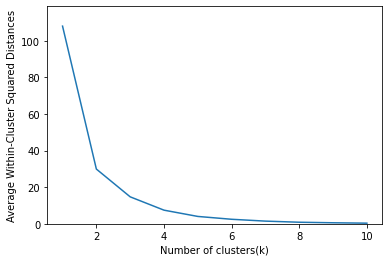

In [64]:
kmeans = KMeans(n_clusters = 10, random_state=0).fit(cluster_numeric_df_norm)
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(cluster_numeric_df_norm)
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(1, 11), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()

The code allows us to print out an elbow chart which lets us visualize which k value is the best. In this chart, it is a bit difficult to see where the optimal k value will be so we decided to do another chart below.

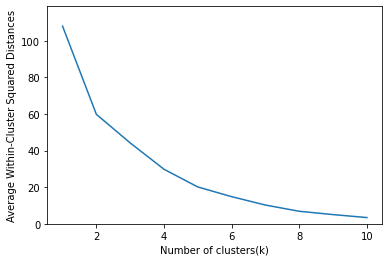

In [65]:
kmeans = KMeans(n_clusters = 10, random_state=0).fit(cluster_numeric_df_norm)
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(cluster_numeric_df_norm)
    inertia.append(kmeans.inertia_)
inertias = pd.DataFrame({'n_clusters': range(1, 11), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()

By taking out the portion where we would devide by n_clusters, it is a better visualization that 5 is the best optimal value for K.

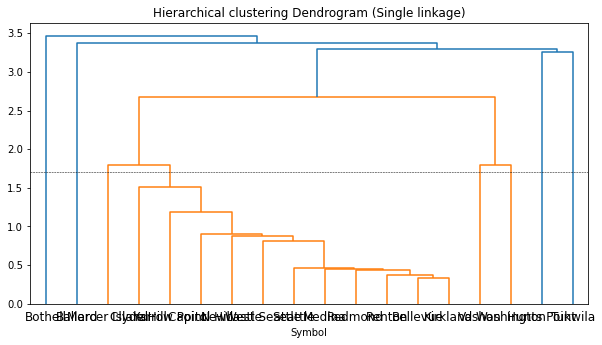

In [66]:
Z = linkage(cluster_numeric_df_norm, method='single')
fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(bottom=0.23)
plt.title('Hierarchical clustering Dendrogram (Single linkage)')
plt.xlabel('Symbol')
dendrogram(Z, labels = cluster_df.index, color_threshold=2.75)
plt.axhline(y=1.7, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

With this code we make a dendrogram based on single linkage to see the the clusters are being formed based on their proximity with each other. The shorter the distance the more likely they will become a cluster

In [67]:
memb = fcluster(linkage(cluster_numeric_df_norm, 'single'), 10, criterion='maxclust')
memb = pd.Series(memb, index = cluster_df.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

1 :  Bellevue, Capitol Hill, Kirkland, Medina, Newcastle, Redmond, Renton, Seattle, West Seattle
2 :  Yarrow Point
3 :  Clyde Hill
4 :  Mercer Island
5 :  Vashon
6 :  Washington
7 :  Hunts Point
8 :  Tukwila
9 :  Ballard
10 :  Bothell


After making these clusters based on single linkaged, we make a for loop to print out each cluster

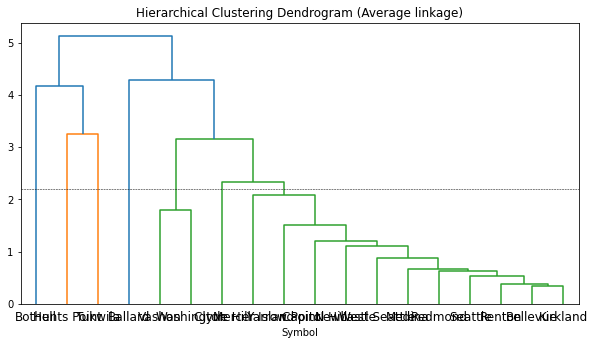

In [68]:
Z = linkage(cluster_numeric_df_norm, method='average')
fig=plt.figure(figsize=(10, 6))
fig.subplots_adjust(bottom=0.23)
plt.title('Hierarchical Clustering Dendrogram (Average linkage)')
plt.xlabel('Symbol')
dendrogram(Z, labels=cluster_df.index, color_threshold=3.6)
plt.axhline(y=2.2, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

Similar to the chart above, we make another dendrogram, this time based on average linkage which is based on highest cohesion with each other. We draw the line at 2.2 so that we are able to capture 5 clusters.

In [69]:
memb = fcluster(linkage(cluster_numeric_df_norm, 'average'), 10, criterion='maxclust')
memb = pd.Series(memb, index=cluster_df.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

1 :  Hunts Point
2 :  Tukwila
3 :  Bothell
4 :  Vashon
5 :  Washington
6 :  Bellevue, Capitol Hill, Kirkland, Medina, Newcastle, Redmond, Renton, Seattle, West Seattle
7 :  Yarrow Point
8 :  Mercer Island
9 :  Clyde Hill
10 :  Ballard


This lets us see the clusters again and we can see that clusters are much different than the single linkage

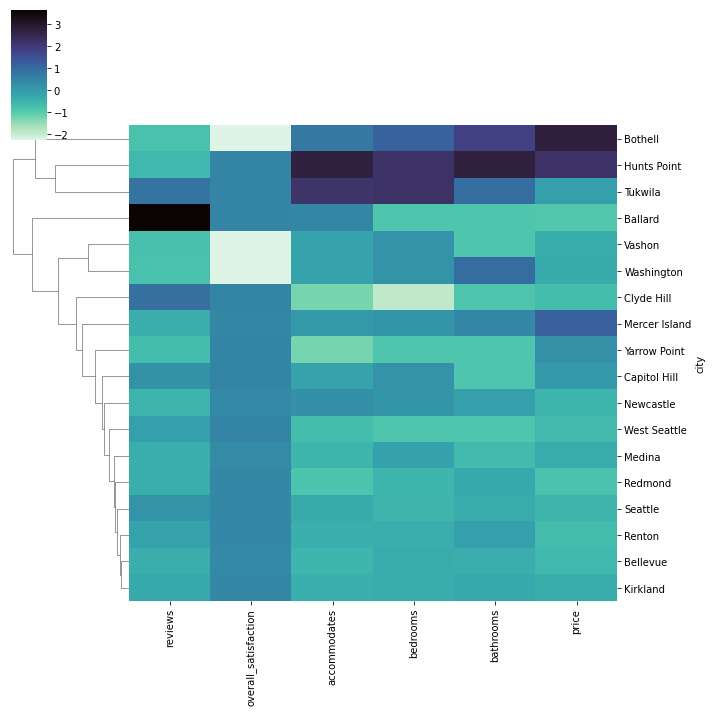

In [70]:
cluster_df.index = ['{}: {}'.format(cluster, Symbol) for cluster,  Symbol in zip(memb, cluster_df.index)]
sns.clustermap(cluster_numeric_df_norm, method='average', col_cluster=False, cmap='mako_r')
plt.show()

We then made a heat graph that allows us to visualize our data within the dendrogram and see why it came out as it did within the singl elinkage method. The major of the data below Washington seems to be homogenous which is why they ended up becoming a single cluster in the end where as the two cities, Bothell and Hunts Point seemm to be a lot darker which is why they sticked with one another until the very last time we group them into a single cluster.

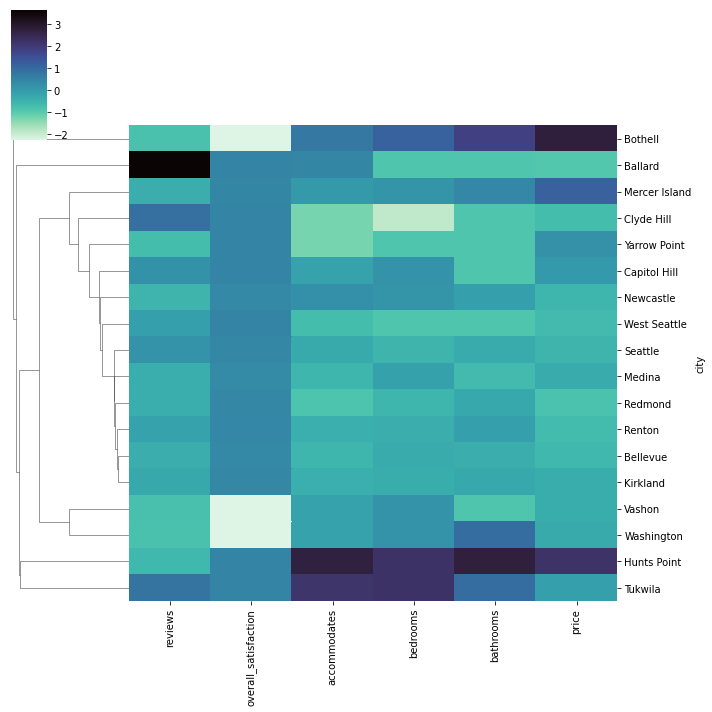

In [71]:
cluster_df.index = ['{}: {}'.format(cluster, Symbol) for cluster,  Symbol in zip(memb, cluster_df.index)]
sns.clustermap(cluster_numeric_df_norm, method='single', col_cluster=False, cmap='mako_r')
plt.show()

This heatmap visualizes our average linkage method for the dendrogram and we can see that it comes out with different clusters. The main thing we see here that was address in the heatmap above was that Hunts Point and Bothell are no longer clustered together. Originally, they were clustered together most likely because of their dark hue within price but now we see that it makes more sense to not group the two. Hunts Points has a lot more similarities throughout all the columns with Tukwila such as bedrooms and acommodates which is why they were grouped together. 